# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        #sleep(5)
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
   # print(city_url)
    #break

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the OpenWeatherMap API
        response = requests.get(city_url)

        # If the response is successful (status code 200), parse the JSON and retrieve data
        #if response.status_code == 200:
        city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

            # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

       # else:
            #print(f"Error: {response.status_code} - {response.content}")

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {str(e)}")

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | kinwat
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | floro
Processing Record 13 of Set 1 | haiku-pauwela
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | taiohae
City not found. Skipping... Error: 'coord'
Processing Record 16 of Set 1 | kendari
Processing Record 17 of Set 1 | kirensk
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | kourou
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | ark

City not found. Skipping... Error: 'coord'
Processing Record 38 of Set 4 | port elizabeth
Processing Record 39 of Set 4 | bayan nur
City not found. Skipping... Error: 'coord'
Processing Record 40 of Set 4 | zharkent
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | nelson bay
Processing Record 44 of Set 4 | nonsan
Processing Record 45 of Set 4 | jindabyne
Processing Record 46 of Set 4 | mao
Processing Record 47 of Set 4 | sinabang
Processing Record 48 of Set 4 | vallenar
Processing Record 49 of Set 4 | kone
Processing Record 50 of Set 4 | vilyuchinsk
Processing Record 1 of Set 5 | trincomalee
Processing Record 2 of Set 5 | porto velho
Processing Record 3 of Set 5 | shalqar
Processing Record 4 of Set 5 | prince rupert
Processing Record 5 of Set 5 | tynda
Processing Record 6 of Set 5 | smithers
Processing Record 7 of Set 5 | argo
Processing Record 8 of Set 5 | isafjordur
Processing Record 9 of Set 5 | nzerekore
Processing R

Processing Record 24 of Set 8 | genlis
Processing Record 25 of Set 8 | fada
Processing Record 26 of Set 8 | guerrero negro
Processing Record 27 of Set 8 | nagqu
Processing Record 28 of Set 8 | aosta
Processing Record 29 of Set 8 | t'aebaek
Processing Record 30 of Set 8 | vrnjacka banja
Processing Record 31 of Set 8 | happy valley-goose bay
Processing Record 32 of Set 8 | lusambo
Processing Record 33 of Set 8 | zhangjiakou
Processing Record 34 of Set 8 | minjur
Processing Record 35 of Set 8 | ambon
Processing Record 36 of Set 8 | bedesa
Processing Record 37 of Set 8 | saint-francois
Processing Record 38 of Set 8 | rong'an
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | tobol'sk
Processing Record 41 of Set 8 | brookings
Processing Record 42 of Set 8 | valera
Processing Record 43 of Set 8 | longonjo
Processing Record 44 of Set 8 | cooper's town
Processing Record 45 of Set 8 | alindao
Processing Record 46 of Set 8 | gamba
Processing Record 47 of Set 8 | yatou
Proces

Processing Record 8 of Set 12 | enewetak
Processing Record 9 of Set 12 | bairnsdale
Processing Record 10 of Set 12 | bonthe
Processing Record 11 of Set 12 | al jawf
Processing Record 12 of Set 12 | pul-e khumri
Processing Record 13 of Set 12 | qarazhal
Processing Record 14 of Set 12 | klyuchi
Processing Record 15 of Set 12 | ha giang
Processing Record 16 of Set 12 | dakhla
Processing Record 17 of Set 12 | labytnangi
Processing Record 18 of Set 12 | taveta
Processing Record 19 of Set 12 | tranovaho
City not found. Skipping... Error: 'coord'
Processing Record 20 of Set 12 | okhotsk
Processing Record 21 of Set 12 | palangkaraya
Processing Record 22 of Set 12 | novyy urengoy
Processing Record 23 of Set 12 | severo-yeniseyskiy
Processing Record 24 of Set 12 | palopo
Processing Record 25 of Set 12 | sosnovo-ozerskoye
Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | polovinnoye
Processing Record 28 of Set 12 | rehoboth
Processing Record 29 of Set 12 | hirara
Processi

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.6177,-121.9166,11.88,91,100,3.60,US,1684761414
1,albany,42.6001,-73.9662,15.15,62,1,0.45,US,1684761324
2,puerto natales,-51.7236,-72.4875,2.25,64,75,5.66,CL,1684761414
3,papatowai,-46.5619,169.4708,9.89,80,100,4.34,NZ,1684761415
4,tura,25.5198,90.2201,25.06,76,0,1.96,IN,1684761415


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,11.88,91,100,3.60,US,1684761414
1,albany,42.6001,-73.9662,15.15,62,1,0.45,US,1684761324
2,puerto natales,-51.7236,-72.4875,2.25,64,75,5.66,CL,1684761414
3,papatowai,-46.5619,169.4708,9.89,80,100,4.34,NZ,1684761415
4,tura,25.5198,90.2201,25.06,76,0,1.96,IN,1684761415


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

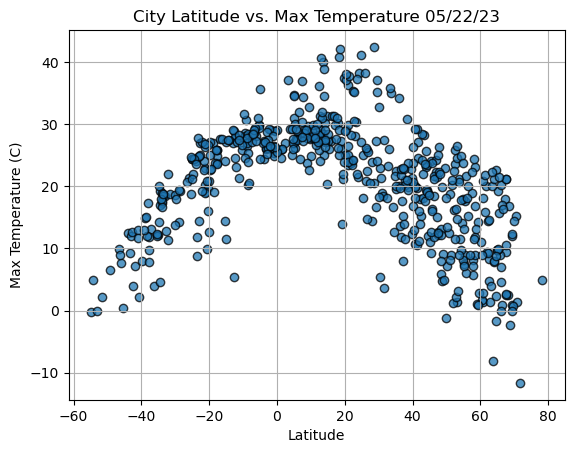

In [20]:
# Extract latitude and max temperature data from city_data
latitudes = [data["Lat"] for data in city_data]
max_temps = [data["Max Temp"] for data in city_data]

# Build scatter plot for latitude vs. temperature
plt.scatter(latitudes, max_temps, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show() 

#### Latitude Vs. Humidity

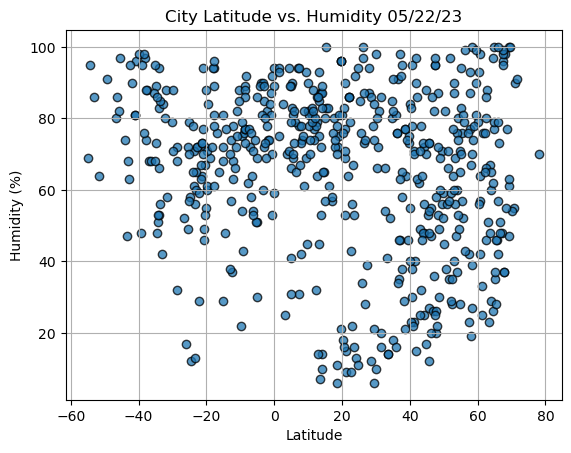

In [19]:
# Extract latitude and humidity data from city_data
latitudes = [data["Lat"] for data in city_data]
city_humidity = [data["Humidity"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_humidity, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()




#### Latitude Vs. Cloudiness

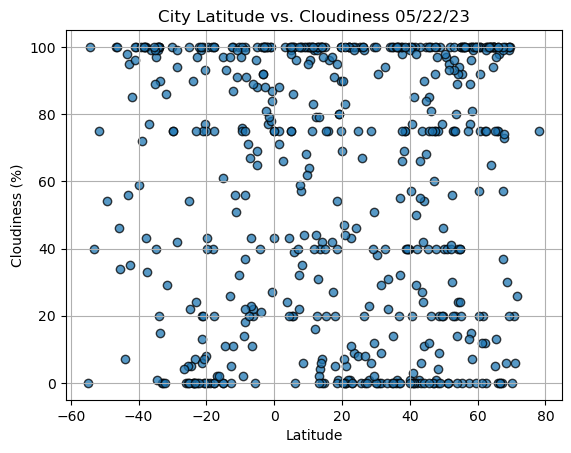

In [18]:
# Extract latitude and cloudiness data from city_data
latitudes = [data["Lat"] for data in city_data]
city_clouds = [data["Cloudiness"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_clouds, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

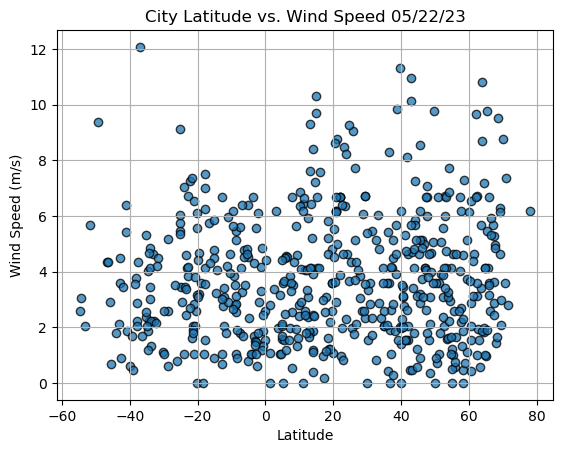

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitudes = [data["Lat"] for data in city_data]
city_wind = [data["Wind Speed"] for data in city_data]

# Build scatter plot for latitude vs. humidity
plt.scatter(latitudes, city_wind, edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.text(0.05, 0.9, line_eq, fontsize=12, color="red", transform=plt.gca().transAxes)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(0,6))

#regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Latitude')
#plt.ylabel('Max Temp')
#plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,0))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



**Discussion about the linear relationship:** There is a pretty strong correlation between the Max Temperature and latitude.  The closer the latitude is to 0, the higher the Max Temp is.  The Northern Hemisphere has a strong negative correlation as the latitude is increasing away from 0, and the Southern Hemisphere has a positive correlation as the latitude is increasing and getting closer to 0.

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))


#x_values = northern_hemi_df['Lat']
#y_values = northern_hemi_df['Humidity']
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
#plt.xlabel('Latitude')
#plt.ylabel('Humidity')
#plt.show()

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,0))


**Discussion about the linear relationship:** In both of these graphs, there are small r values and pretty flat linear regression lines.  There appears to be no correlation ebtewen latitude and humidity in the Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))


In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,0))


**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the r values are very small and the linear regression lines are relaatively flat, indicating no correlation between cloudiness and latitude.  Both graphs have the points scattered all over. 

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,0))

**Discussion about the linear relationship:** There is not a strong correlation between wind speed and latitude.  The linear regression is slightly positive in the Northern Hemisphere and slightly negative in the Southern hemisphere, so the wind speed is slightly higher the further away the latitude gets from 0, the r value is very low and the lines are relatively flat.  